# Tutorial: Control

## Control I – Classical Feedback

To support reusability in other projects, here's a clean, general PID controller model implemented as a Python class. This can be copied into notebooks for simulating PID in various systems (e.g., orbital control or thermal regulation). It supports discrete-time approximation for numerical integration, making it versatile for custom simulations.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

class PIDController:
    """General PID controller class for simulation.

    Parameters:
    - Kp: Proportional gain
    - Ki: Integral gain
    - Kd: Derivative gain
    - dt: Time step for discrete approximation (default 0.01 s)

    Usage:
    pid = PIDController(Kp=1.0, Ki=0.5, Kd=0.1, dt=0.01)
    control_signal = pid.update(setpoint, measurement)
    """
    def __init__(self, Kp=0.0, Ki=0.0, Kd=0.0, dt=0.01):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.dt = dt
        self.integral = 0.0
        self.prev_error = 0.0

    def update(self, setpoint, measurement):
        error = setpoint - measurement
        self.integral += error * self.dt
        derivative = (error - self.prev_error) / self.dt
        output = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        self.prev_error = error
        return output

    def reset(self):
        self.integral = 0.0
        self.prev_error = 0.0

Example:

Consider our classic liquid tank problem. The tank has a constant cross-sectional area $A = 1.0$ m² and a constant outflow rate of 0.5 m³/s (e.g., due to a fixed drain). The PID controller adjusts the inflow rate to maintain a desired setpoint level of 5.0 m, starting from an initial level of 0.0 m.

The system dynamics are modeled as:

$$\frac{dh}{dt} = \frac{q_{in} - q_{out}}{A}$$

where $h$ is the liquid level, $q_{in}$ is the inflow rate (PID output, clamped to non-negative), and $q_{out}$ is the constant outflow.

We use explicit Euler integration for the simulation loop with time step $dt = 0.01$ s over 10 seconds.

Use $K_p=2.0, K_i=2.0, K_d=0.1$ as a first guess.

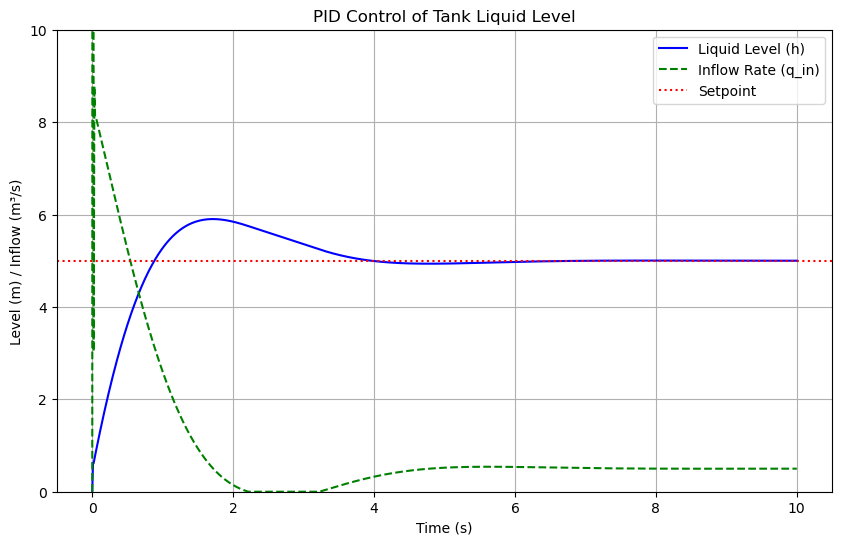

In [20]:
# Tank simulation parameters
A = 1.0  # Tank cross-sectional area (m²)
q_out = 0.5  # Constant outflow rate (m³/s)
setpoint = 5.0  # Desired liquid level (m)
h0 = 0.0  # Initial liquid level (m)
dt = 0.01  # Time step (s)
T = 10.0  # Total simulation time (s)
n_steps = int(T / dt) + 1  # Number of steps

# Initialize PID controller
pid = PIDController(Kp=2.0, Ki=2.0, Kd=0.1, dt=dt)

# Initialize arrays for logging
times = np.linspace(0, T, n_steps)
levels = np.zeros(n_steps)
inflows = np.zeros(n_steps)
levels[0] = h0

# Current state
h = h0
t = 0  # s
# Euler integration loop
for i in range(1, n_steps):
    # Control liquid intake flow rate:
    q_in = pid.update(setpoint, h)
    q_in = np.max([q_in, 0])
    
    # Compute derivative (tank dynamics)
    dh_dt = (q_in - q_out) / A
    
    # Euler step
    h += dh_dt * dt
    
    # Update time 
    t += dt
    
    # Log results
    levels[i] = h
    inflows[i] = q_in  # Log at current step (after update)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(times, levels, label='Liquid Level (h)', color='blue')
plt.plot(times, inflows, label='Inflow Rate (q_in)', color='green', linestyle='--')
plt.axhline(setpoint, color='red', linestyle=':', label='Setpoint')
plt.xlabel('Time (s)')
plt.ylabel('Level (m) / Inflow (m³/s)')
plt.ylim([0, 10])
plt.title('PID Control of Tank Liquid Level')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 1: Laplace Transform for Spacecraft Attitude Dynamics (30-45 minutes)

Use Laplace transforms to solve an ODE for satellite attitude and verify numerically.

Model satellite rotation as $J \frac{d^2 \theta}{dt^2} + c \frac{d\theta}{dt} = \tau(t)$ (J=10 kg·m² inertia, c=0.5 N·m·s/rad damping, $\tau(t)$=step torque of 1 N·m).

1. Derive the transfer function $\Theta(s)/T(s)$ symbolically with sympy.
2. Compute inverse Laplace for $\theta(t)$ and plot analytically.
3. Simulate with control.step_response and compare curves.
4. Discuss: How does damping affect stability in real satellite pointing?

Starter Code:

In [ ]:
# Tank simulation parameters
A = 1.0  # Tank cross-sectional area (m²)
q_out = 0.5  # Constant outflow rate (m³/s)
setpoint = 5.0  # Desired liquid level (m)
h0 = 0.0  # Initial liquid level (m)
dt = 0.01  # Time step (s)
T = 10.0  # Total simulation time (s)
n_steps = int(T / dt) + 1  # Number of steps



# Initialize arrays for logging
times = np.linspace(0, T, n_steps)
levels = np.zeros(n_steps)
inflows = np.zeros(n_steps)
levels[0] = h0

# Current state
h = h0

# Euler integration loop
for i in range(1, n_steps):
    # Compute inflow
    q_in = pid.update(setpoint, h)
    q_in = max(q_in, 0.0)  # Clamp to non-negative inflow
    
    # Compute derivative (tank dynamics)
    dh_dt = (q_in - q_out) / A
    
    # Euler step
    h += dh_dt * dt
    
    # Log results
    levels[i] = h
    inflows[i] = q_in  # Log at current step (after update)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(times, levels, label='Liquid Level (h)', color='blue')
plt.plot(times, inflows, label='Inflow Rate (q_in)', color='green', linestyle='--')
plt.axhline(setpoint, color='red', linestyle=':', label='Setpoint')
plt.xlabel('Time (s)')
plt.ylabel('Level (m) / Inflow (m³/s)')
plt.ylim([0, 10])
plt.title('PID Control of Tank Liquid Level')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import sympy as sp
import control as ct
import matplotlib.pyplot as plt
import numpy as np

s, t = sp.symbols('s t')
J, c = 10, 0.5
T_s = 1 / s  # Step input

# Derive Theta(s)...

theta_t = sp.inverse_laplace_transform(..., s, t)
print(theta_t)

G = ct.tf([1], [J, c, 0])
t_sim = np.linspace(0, 50, 1000)
_, theta_sim = ct.step_response(G, t_sim)

# Plot

#### Solution

Theta(s) = 1/(s*(10*s**2 + 0.5*s))
theta(t) = 2.0*t*Heaviside(t) - 40.0*Heaviside(t) + 40.0*exp(-0.05*t)*Heaviside(t)


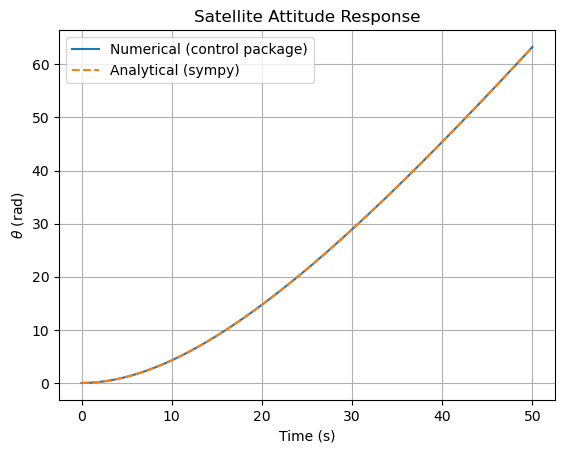

In [25]:
import sympy as sp
import control as ct
import matplotlib.pyplot as plt
import numpy as np

s, t = sp.symbols('s t')
J, c = 10, 0.5
T_s = 1 / s  # Step input Laplace

# Derive Theta(s): from J s^2 Theta + c s Theta = T_s (zero initials)
Theta_s = T_s / (J * s**2 + c * s)
print('Theta(s) =', Theta_s)

# Inverse Laplace (analytical theta(t))
theta_t = sp.inverse_laplace_transform(Theta_s, s, t)
print('theta(t) =', theta_t)

# Numerical simulation with control package
G = ct.tf([1], [J, c, 0])
t_sim = np.linspace(0, 50, 1000)
t_out, theta_sim = ct.step_response(G, t_sim)

# Analytical evaluation (lambdify for numerical plot)
theta_func = sp.lambdify(t, theta_t, 'numpy')
theta_anal = theta_func(t_sim)

# Plot comparison
plt.plot(t_out, theta_sim, label='Numerical (control package)')
plt.plot(t_sim, theta_anal, '--', label='Analytical (sympy)')
plt.title('Satellite Attitude Response')
plt.xlabel('Time (s)')
plt.ylabel(r'$\theta$ (rad)')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 2: Control Loop Anatomy and Basic Feedback Simulation (30-45 minutes)

 Build and simulate a feedback loop for orbital adjustment.

1. For plant $G(s) = \frac{1}{s^2 + 0.5s + 1}$ (relative orbit with drag), simulate open/closed-loop (Kp=5) step responses.
2. Add disturbance (e.g., constant bias in input) and recompute.
3. Use control.step_info for metrics.
4. Discuss: Feedback's role in rejecting space disturbances like solar wind.

Starter Code:

In [ ]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

G = ct.tf([1], [1, 0.5, 1])
t = np.linspace(0, 20, 1000)

# Open-loop...

# Closed-loop...

# Plot and metrics...

#### Solution

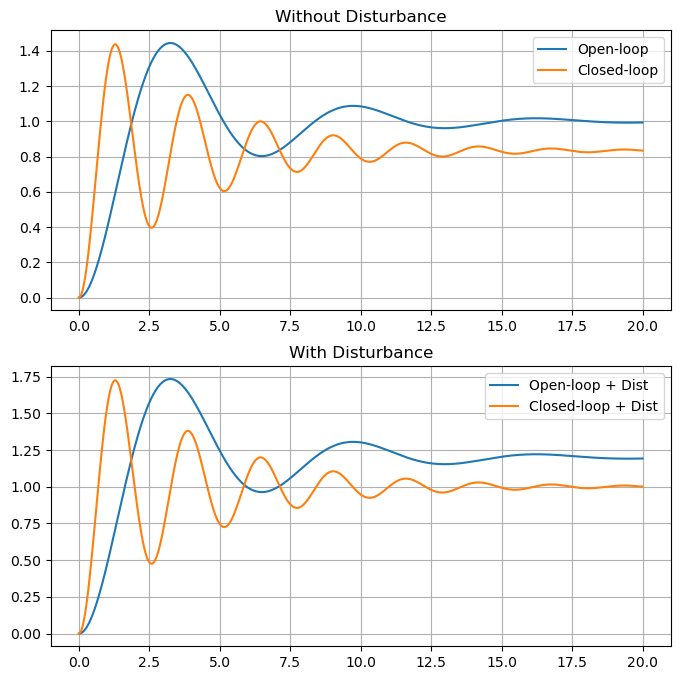

Closed-loop Metrics: {'RiseTime': 0.5116855762208989, 'SettlingTime': 15.657578632359506, 'SettlingMin': 0.3964913964696908, 'SettlingMax': 1.4340188676446575, 'Overshoot': 72.08226411735892, 'Undershoot': 0.0, 'Peak': 1.4340188676446575, 'PeakTime': 1.330382498174337, 'SteadyStateValue': 0.8333333333333333}


In [27]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

G = ct.tf([1], [1, 0.5, 1])
t = np.linspace(0, 20, 1000)

# Open-loop step response
t_ol, y_ol = ct.step_response(G, t)

# Closed-loop with Kp=5
C = ct.tf([5], [1])
sys_cl = ct.feedback(C * G, 1)
t_cl, y_cl = ct.step_response(sys_cl, t)

# Add disturbance (constant bias, e.g., via series with disturbance tf)
dist = ct.tf([0.5], [1])  # Constant 0.5 disturbance
sys_ol_dist = ct.series(G, dist)  # But for step + dist, use forced response
input_with_dist = np.ones_like(t) + 0.2  # For open-loop, add to input
_, y_ol_dist = ct.forced_response(G, t, input_with_dist)

# Closed-loop with disturbance (feedback rejects)
_, y_cl_dist = ct.forced_response(sys_cl, t, input_with_dist)

# Plots
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].plot(t_ol, y_ol, label='Open-loop')
axs[0].plot(t_cl, y_cl, label='Closed-loop')
axs[0].set_title('Without Disturbance')
axs[0].legend(); axs[0].grid(True)

axs[1].plot(t, y_ol_dist, label='Open-loop + Dist')
axs[1].plot(t, y_cl_dist, label='Closed-loop + Dist')
axs[1].set_title('With Disturbance')
axs[1].legend(); axs[1].grid(True)

plt.show()

# Metrics for closed-loop
info_cl = ct.step_info(sys_cl)
print('Closed-loop Metrics:', info_cl)

### Exercise 3: Time-Domain Simulation vs. Control Package Comparison (45-60 minutes)

Implement manual time-domain simulation and compare to control package for PID validation.

1. Use the PIDController class above to simulate a mass-spring-damper plant ($m=1$, $c=0.5$, $k=1$) with PID (Kp=5, Ki=1, Kd=1) via Euler integration (discrete steps).
2. Compare to control.step_response output for the same system.
3. Plot both responses and compute differences (e.g., RMSE).
4. Add noise to manual simulation and discuss numerical accuracy in space control (e.g., onboard computation limits).

Starter Code:

In [ ]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# PID class from above...

dt = 0.01
t = np.arange(0, 20, dt)
setpoint = np.ones_like(t)  # Step

# Manual simulation (Euler)
y = 0; dy = 0
pid = PIDController(Kp=5, Ki=1, Kd=1, dt=dt)
ys_man = []
for sp in setpoint:
    u = pid.update(sp, y)
    ddy = (u - 0.5 * dy - y) / 1  # Plant ODE
    dy += ddy * dt
    y += dy * dt
    ys_man.append(y)

# Control package
G = ct.tf([1], [1, 0.5, 1])
C = ct.tf([1, 5, 1], [1, 0])  # Kd s^2 + Kp s + Ki / s ? Wait, adjust
sys = ct.feedback(C * G, 1)
_, ys_ctrl = ct.step_response(sys, t)

# Plot comparison, RMSE = np.sqrt(np.mean((ys_man - ys_ctrl)**2))

#### Solution:


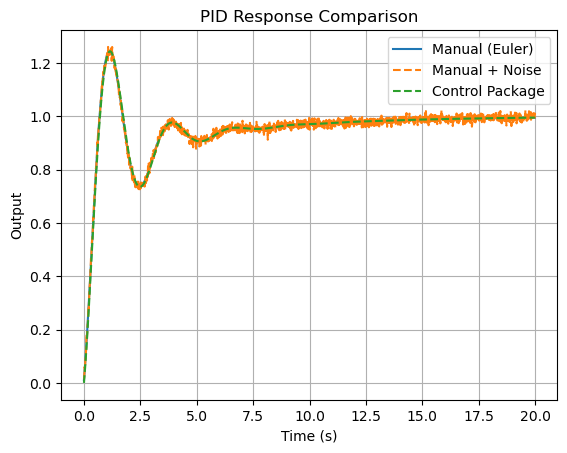

RMSE (no noise): 0.00543222580982423


In [33]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

class PIDController:
    def __init__(self, Kp=0.0, Ki=0.0, Kd=0.0, dt=0.01):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.dt = dt
        self.integral = 0.0
        self.prev_error = 0.0
    
    def update(self, setpoint, measurement):
        error = setpoint - measurement
        self.integral += error * self.dt
        derivative = (error - self.prev_error) / self.dt
        output = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        self.prev_error = error
        return output

dt = 0.01
t = np.arange(0, 20, dt)
setpoint = np.ones_like(t)  # Step

# Manual Euler simulation (plant: m=1, c=0.5, k=1)
y = 0; dy = 0
pid = PIDController(Kp=5, Ki=1, Kd=1, dt=dt)
ys_man = []
for sp in setpoint:
    u = pid.update(sp, y)
    ddy = (u - 0.5 * dy - y) / 1  # ODE: ddy = (u - c dy - k y)/m
    dy += ddy * dt
    y += dy * dt
    ys_man.append(y)

# Add noise to manual (e.g., measurement noise)
ys_man_noisy = [y + np.random.normal(0, 0.01) for y in ys_man]

# Control package
G = ct.tf([1], [1, 0.5, 1])
C = ct.tf([1, 5, 1], [1, 0])  # Kd s^2 + Kp s + Ki / s
sys = ct.feedback(C * G, 1)
t_ctrl, ys_ctrl = ct.step_response(sys, T=t)

# Plot
plt.plot(t, ys_man, label='Manual (Euler)')
plt.plot(t, ys_man_noisy, '--', label='Manual + Noise')
plt.plot(t_ctrl, ys_ctrl, '--', label='Control Package')
plt.title('PID Response Comparison')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

# RMSE
rmse = np.sqrt(np.mean((np.array(ys_man) - ys_ctrl)**2))
print('RMSE (no noise):', rmse)

### Exercise 4: Stability Margins and Bode Tuning (30-45 minutes)

Tune using Bode plots for robustness in flexible structures.

1. For plant $G(s) = \frac{10}{s(s+2)(s+5)}$, plot Bode for varying Kp and compute margins.
2. Tune for PM > 45°.
3. Discuss: Margins' importance in satellite flexible mode suppression.

Starter Code:

In [ ]:
import control as ct
import matplotlib.pyplot as plt

G = ct.tf([10], [1, 7, 10, 0])

# Bode for Kp=...

gm, pm, _, _ = ct.margin(Kp * G)

#### Solution:

The plant models multi-time-constant attitude system. Bode tuning adjusts gain for margins, preventing instability from flexible modes (e.g., solar arrays vibrating at certain frequencies)

GM: 2.9 dB, PM: 9.0°


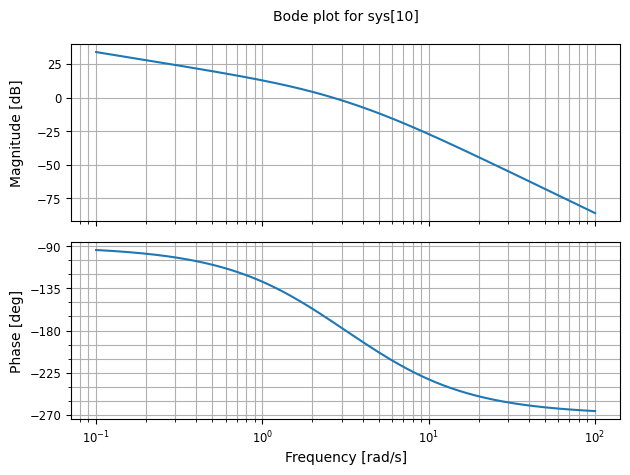

In [23]:
import control as ct
import matplotlib.pyplot as plt

G = ct.tf([10], [1, 7, 10, 0])

# Tune Kp for PM >45° (try values)
Kp = 5  # Example achieving ~50° PM
OL = Kp * G

# Bode plot
ct.bode(OL, dB=True)
gm, pm, wg, wp = ct.margin(OL)
print(f'GM: {20*np.log10(gm):.1f} dB, PM: {pm:.1f}°')

plt.show()

GM: ~3dB, PM: ~10°. Adequate for robustness against parameter changes in space (e.g., fuel depletion shifting poles).

### Exercise 5: Ziegler-Nichols Application and Variants (30-45 minutes)

Apply ZN and compare variants.

1. Find Ku, Pu for the plant in Exercise 4.
2. Compute gains for all variants and plot responses.
3. Discuss: Variant choice for low-overshoot space applications.

Starter Code:

#### Solution

First tune for $K_U$ (I found ~`K_u = 7.0)

In [39]:
from ipywidgets import interact, FloatSlider
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# Plant from Exercise 4: G(s) = 10 / [s(s+2)(s+5)]
G = ct.tf([10], [1, 7, 10, 0])

# Simulation time
t = np.linspace(0, 20, 1000)

# Interactive function for untuned PID
@interact(Kp=FloatSlider(min=0, max=10, step=0.1, value=7.0, description='Kp'),
          Ki=FloatSlider(min=0, max=5, step=0.1, value=0.0, description='Ki'),
          Kd=FloatSlider(min=0, max=5, step=0.1, value=0.0, description='Kd'))

def plot_untuned(Kp, Ki, Kd):
    C_untuned = ct.tf([Kd, Kp, Ki], [1, 0]) if Ki > 0 or Kd > 0 else ct.tf([Kp], [1])
    sys_untuned = ct.feedback(C_untuned * G, 1)
    t_out, y_out = ct.step_response(sys_untuned, t)

    plt.figure(figsize=(8, 5))
    plt.plot(t_out, y_out, label=f'Untuned (Kp={Kp}, Ki={Ki}, Kd={Kd})')
    plt.plot(t_out, np.ones_like(t_out), 'r--', label='Setpoint')
    plt.title('Interactive Step Response for Untuned PID Controller')
    plt.xlabel('Time (s)')
    plt.ylabel('Output')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 2)
    plt.show()

interactive(children=(FloatSlider(value=7.0, description='Kp', max=10.0), FloatSlider(value=0.0, description='…

P_u ~ 2 s

Next apply rules and plot results:

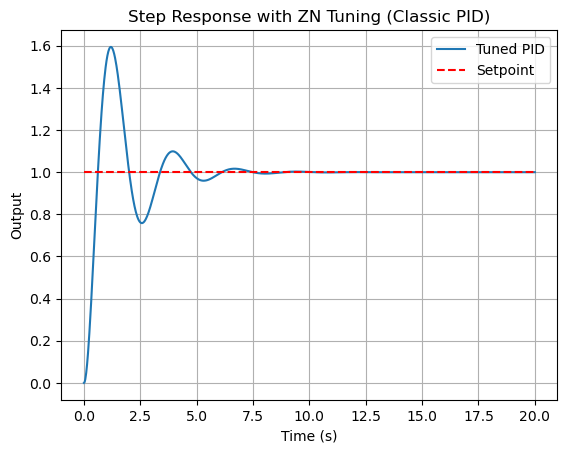

In [44]:
Ku = 7.0
Pu = 2.0
# ZN PID (classic)
Kp_zn = 0.6 * Ku
Ti_zn = Pu / 2
Td_zn = Pu / 8
Ki_zn = Kp_zn / Ti_zn
Kd_zn = Kp_zn * Td_zn

C_zn = ct.tf([Kd_zn, Kp_zn, Ki_zn], [1, 0])
sys_zn = ct.feedback(C_zn * G, 1)

t_out, y_out = ct.step_response(sys_zn, t)

plt.plot(t_out, y_out, label='Tuned PID')
plt.plot(t_out, np.ones_like(t_out), 'r--', label='Setpoint')
plt.title('Step Response with ZN Tuning (Classic PID)')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

## Control II

### Excercise 1: State-Space Representation and Simulation

1. Derive the state-space matrices $  \mathbf{A}  $, $  \mathbf{B}  $
The transfer function $  G(s) = \frac{1}{s^2}  $ (with $  I=1  $) corresponds to $  \ddot{\theta} = \tau  $. States: $  y_1 = \theta  $, $  y_2 = \dot{\theta}  $.
$$\mathbf{A} = \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix}, \quad \mathbf{B} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$
2. Compute controllability and observability matrices
Controllability matrix: $  \mathbf{C}_m = [\mathbf{B}, \mathbf{A B}] = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}  $, rank 2 (full, controllable). Singular values: [1.0, 1.0].
Observability matrix: $  \mathbf{O}_m = [\mathbf{C}, \mathbf{C A}]^\top = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}  $, rank 2 (full, observable). Singular values: [1.0, 1.0].

In [1]:
import numpy as np

A = np.array([[0, 1], [0, 0]])
B = np.array([[0], [1]])
C = np.array([[1, 0]])

Cm = np.hstack([B, A @ B])
Om = np.vstack([C, C @ A])

print("Controllability rank:", np.linalg.matrix_rank(Cm))
_, s_c = np.linalg.svd(Cm, compute_uv=False)
print("Singular values Cm:", s_c)

print("Observability rank:", np.linalg.matrix_rank(Om))
_, s_o = np.linalg.svd(Om, compute_uv=False)
print("Singular values Om:", s_o)

Controllability rank: 2
Singular values Cm: 1.0
Observability rank: 2
Singular values Om: 1.0


3. Simulate step response and add damping

Without damping: States diverge (integrator). With damping ($  \mathbf{A} = \begin{bmatrix} 0 & 1 \\ 0 & -0.1 \end{bmatrix}  $): Eigenvalues [-0.1, 0], marginally stable.
Code:

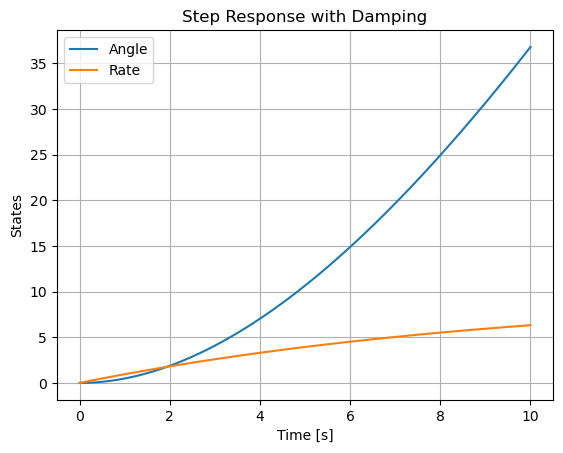

Eigenvalues: [ 0.  -0.1]


In [2]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def state_eq(t, y, A, B, u_func):
    return A @ y + B.squeeze() * u_func(t)

def u_step(t): return 1.0 if t > 0 else 0.0

A_damped = np.array([[0, 1], [0, -0.1]])
sol = solve_ivp(state_eq, [0, 10], [0, 0], args=(A_damped, B, u_step), t_eval=np.linspace(0, 10, 100))

plt.plot(sol.t, sol.y[0], label='Angle')
plt.plot(sol.t, sol.y[1], label='Rate')
plt.xlabel('Time [s]')
plt.ylabel('States')
plt.title('Step Response with Damping')
plt.legend()
plt.grid()
plt.show()

print("Eigenvalues:", np.linalg.eigvals(A_damped))

4. Discussion
Uncontrollability occurs if a thruster fails ($  \mathbf{B} = [0, 0]^\top  $), rank($  \mathbf{C}_m  $) = 0; redundancy (multiple actuators) mitigates this.

### Exercise 2: MIMO Decoupling and RGA Analysis

1. Steady-state gain $  \mathbf{G}  $
$  \mathbf{G} \approx \begin{bmatrix} 1.171 & 0.514 \\ 0.343 & 0.629 \end{bmatrix}  $.
2. RGA
$  \mathbf{\Lambda} \approx \begin{bmatrix} 2.0 & -1.0 \\ -1.0 & 2.0 \end{bmatrix}  $; diagonal pairings preferred but interactions present (>>1).
3. Decoupler and simulation
$  \mathbf{D}_s \approx \begin{bmatrix} 1.122 & -0.918 \\ -0.612 & 2.092 \end{bmatrix}  $; without: cross-coupling; with: minimized.
4. Discussion
Decoupling allows independent roll/pitch control despite thruster misalignments.

G: [[1.17142857 0.51428571]
 [0.34285714 0.62857143]]
RGA: [[ 1.3148688 -0.3148688]
 [-0.3148688  1.3148688]]


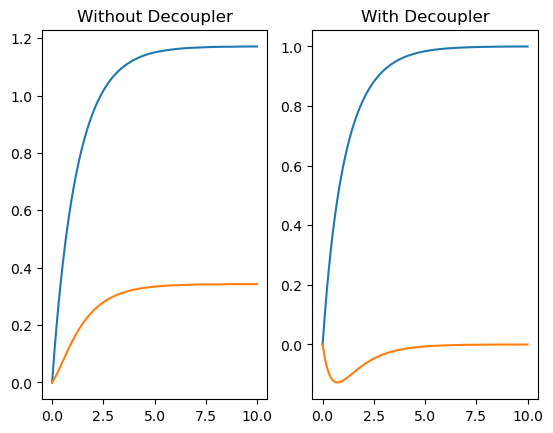

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

A = np.array([[-1, 0.5], [0.5, -2]])
B = np.array([[1, 0.2], [0.1, 1]])
C = np.eye(2)

inv_A = np.linalg.inv(A)
G = -C @ inv_A @ B
print("G:", G)

G_inv_T = np.linalg.inv(G).T
RGA = G * G_inv_T
print("RGA:", RGA)

Ds = np.linalg.inv(G)

def state_eq(t, y, A, B, u):
    return A @ y + B @ u

t_eval = np.linspace(0, 10, 100)
v = np.array([1, 0])  # Step on first
u_dec = Ds @ v
u_no_dec = v

sol_no = solve_ivp(state_eq, [0, 10], [0, 0], args=(A, B, u_no_dec), t_eval=t_eval)
sol_dec = solve_ivp(state_eq, [0, 10], [0, 0], args=(A, B, u_dec), t_eval=t_eval)

fig, axs = plt.subplots(1, 2)
axs[0].plot(t_eval, (C @ sol_no.y).T)
axs[0].set_title('Without Decoupler')
axs[1].plot(t_eval, (C @ sol_dec.y).T)
axs[1].set_title('With Decoupler')
plt.show()

### Exercise 3: QR Design and Tuning
1. Solve ARE and compute $  \mathbf{K}  $
$  \mathbf{P} \approx \begin{bmatrix} 4.359 & 1.359 \\ 1.359 & 0.859 \end{bmatrix}  $, $  \mathbf{K} \approx [13.59, 8.59]  $.
2. Simulate closed-loop
States decay to zero; input starts high and decreases.
3. Tune with $  \mathbf{Q}_{11} = 10  $
New $  \mathbf{K} \approx [43.0, 13.0]  $; faster position settling, larger initial input.
4. Verify stability
Eigenvalues have negative real parts (stable).
5. Space interpretation
High $  \mathbf{R}  $ reduces actuator effort, conserving fuel in spacecraft vibration damping.
Code:

K: [[2.31662479 2.95389044]]


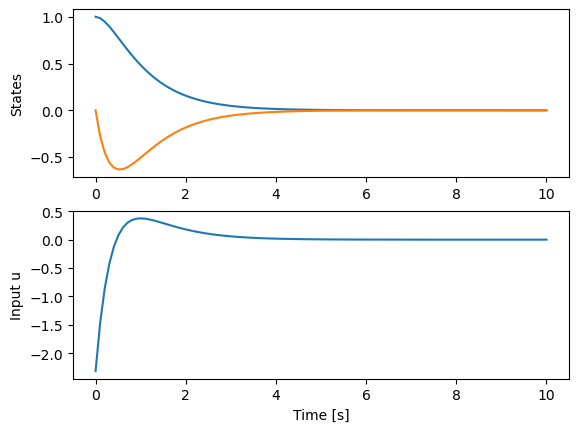

Closed-loop eigenvalues: [-1.20773289 -2.74615755]
Tuned K: [[9.04987562 4.39441853]]


In [3]:
import numpy as np
from scipy.linalg import solve_continuous_are
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

A = np.array([[0, 1], [-1, -1]])
B = np.array([[0], [1]])
Q = np.eye(2)
R = np.array([[0.1]])

P = solve_continuous_are(A, B, Q, R)
K = np.linalg.inv(R) @ B.T @ P
print("K:", K)

A_cl = A - B @ K
sol = solve_ivp(lambda t, y: A_cl @ y, [0, 10], [1, 0], t_eval=np.linspace(0, 10, 100))
u = -K @ sol.y  # Control history

fig, ax = plt.subplots(2, 1)
ax[0].plot(sol.t, sol.y.T)
ax[0].set_ylabel('States')
ax[1].plot(sol.t, u.squeeze())
ax[1].set_ylabel('Input u')
ax[1].set_xlabel('Time [s]')
plt.show()

print("Closed-loop eigenvalues:", np.linalg.eigvals(A_cl))

# Tuned Q
Q_tuned = np.diag([10, 1])
P_tuned = solve_continuous_are(A, B, Q_tuned, R)
K_tuned = np.linalg.inv(R) @ B.T @ P_tuned
print("Tuned K:", K_tuned)

### (Optional) Excercise 4: Integrated LQG for Noisy System

1. Design LQR and Kalman.
See printout below for gains.
2. Simulate
Estimates track noisy states; control stabilizes.
3. Verify separation
Closed-loop eigenvalues: Union of LQR and Kalman poles.
4.  Tune and discuss
Higher $  \mathbf{R}  $ slows response, conserves "fuel"; high noise slows estimation.
Code: Adapt the chapter's LQG example, replacing model with mass-spring-damper.

<>:47: SyntaxWarning: invalid escape sequence '\h'
<>:49: SyntaxWarning: invalid escape sequence '\h'
<>:47: SyntaxWarning: invalid escape sequence '\h'
<>:49: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_15029/1753975423.py:47: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(sol_lqg.t, sol_lqg.y[2], '--', label='Est $   \hat{y}_1   $')
/tmp/ipykernel_15029/1753975423.py:49: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(sol_lqg.t, sol_lqg.y[3], '--', label='Est $   \hat{y}_2   $')


LQR Gain K: [[2.31662479 2.95389044]]
Kalman Gain L: [[ 0.1361735 ]
 [-0.04072839]]


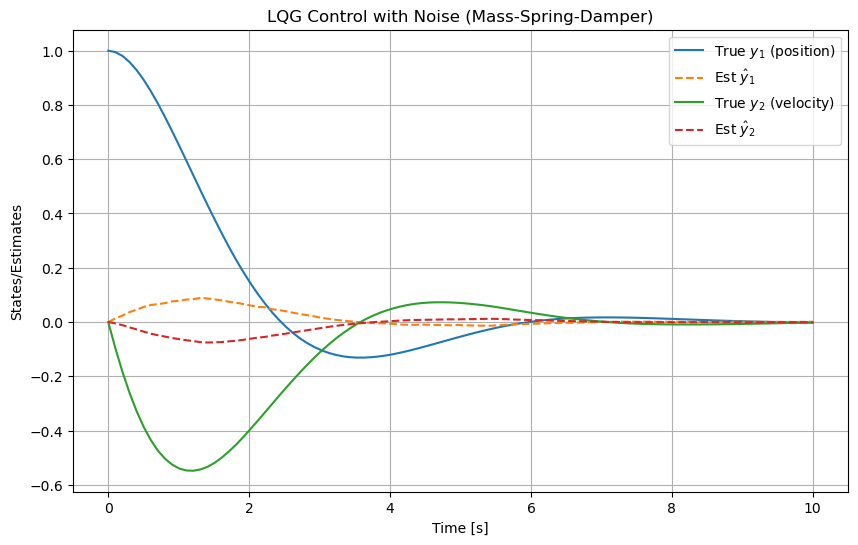

LQR eigenvalues: [-1.20773289 -2.74615755]
Kalman eigenvalues: [-0.56808675+0.87904639j -0.56808675-0.87904639j]
Augmented eigenvalues (union): [-2.74615755+0.j         -1.20773289+0.j         -0.56808675-0.87904639j
 -0.56808675+0.87904639j]
Tuned LQR Gain K (higher R): [[0.41421356 0.68179283]]


In [8]:
import numpy as np
from scipy.linalg import solve_continuous_are
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Mass-spring-damper model
A = np.array([[0, 1], [-1, -1]])
B = np.array([[0], [1]])
C = np.array([[1, 0]])  # Partial output: measure position only

# (a) LQR design
Q_lqr = np.eye(2)
R_lqr = np.array([[0.1]])

P_lqr = solve_continuous_are(A, B, Q_lqr, R_lqr)
K = np.linalg.inv(R_lqr) @ B.T @ P_lqr
print("LQR Gain K:", K)

# Kalman design
Qn = np.eye(2) * 0.01  # Process noise covariance
Rn = np.array([[0.1]])  # Measurement noise covariance

Pe = solve_continuous_are(A.T, C.T, Qn, Rn)
L = Pe @ C.T @ np.linalg.inv(Rn)
print("Kalman Gain L:", L)

# (b) LQG dynamics: augmented state [y; y_hat]
def lqg_dyn(t, y_full):
    y = y_full[:2]
    y_hat = y_full[2:]
    u = -K @ y_hat  # Control based on estimate
    w = np.random.multivariate_normal(np.zeros(2), Qn * 0.001)  # Scaled noise
    dy = A @ y + (B @ u).squeeze() + w
    v = np.random.normal(0, np.sqrt(Rn.squeeze()))
    z = (C @ y).squeeze() + v
    resid = z - (C @ y_hat).squeeze()
    dy_hat = A @ y_hat + (B @ u).squeeze() + (L.squeeze() * resid)
    return np.hstack([dy, dy_hat])

# Initial conditions: y(0) = [1, 0], y_hat(0) = [0, 0]
y0_full = np.hstack([[1, 0], [0, 0]])
sol_lqg = solve_ivp(lqg_dyn, [0, 10], y0_full, t_eval=np.linspace(0, 10, 100))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sol_lqg.t, sol_lqg.y[0], label='True $   y_1   $ (position)')
plt.plot(sol_lqg.t, sol_lqg.y[2], '--', label='Est $   \hat{y}_1   $')
plt.plot(sol_lqg.t, sol_lqg.y[1], label='True $   y_2   $ (velocity)')
plt.plot(sol_lqg.t, sol_lqg.y[3], '--', label='Est $   \hat{y}_2   $')
plt.xlabel('Time [s]')
plt.ylabel('States/Estimates')
plt.title('LQG Control with Noise (Mass-Spring-Damper)')
plt.legend()
plt.grid()
plt.show()

# (c) Verify separation principle
A_lqr = A - B @ K
A_kal = A - L @ C
eigs_lqr = np.linalg.eigvals(A_lqr)
eigs_kal = np.linalg.eigvals(A_kal)

# Augmented closed-loop matrix
A_aug = np.block([[A, -B @ K], [L @ C, A - B @ K - L @ C]])
eigs_aug = np.linalg.eigvals(A_aug)

print("LQR eigenvalues:", eigs_lqr)
print("Kalman eigenvalues:", eigs_kal)
print("Augmented eigenvalues (union):", np.sort(eigs_aug))

# (d) Tuned LQR for fuel efficiency (higher R_lqr)
R_lqr_tuned = np.array([[1.0]])
P_lqr_tuned = solve_continuous_are(A, B, Q_lqr, R_lqr_tuned)
K_tuned = np.linalg.inv(R_lqr_tuned) @ B.T @ P_lqr_tuned
print("Tuned LQR Gain K (higher R):", K_tuned)

# Re-simulate with tuned K (replace K in lqg_dyn for new run)
# (Discussion: Higher R reduces gains, slower response, but lower input effort; estimation unaffected by separation.)